In [1]:
# Import des librairies python utiles pour le projet

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Paramètres graphiques 

plt.rcParams['figure.figsize'] = [10, 10]

# Paramètres de simulation

alpha = 0.7
beta = 0.7
gamma = 0.7
delta = 0.7

In [2]:
# Déclaration des fonctions utiles 

def x1_prime(x1, x2) :
    return x1*(alpha - beta*x2)

def x2_prime(x1, x2) : 
    return -x2*(gamma - delta*x1)

def H(x1, x2) :
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)


### Question 2 : Portraits de phase

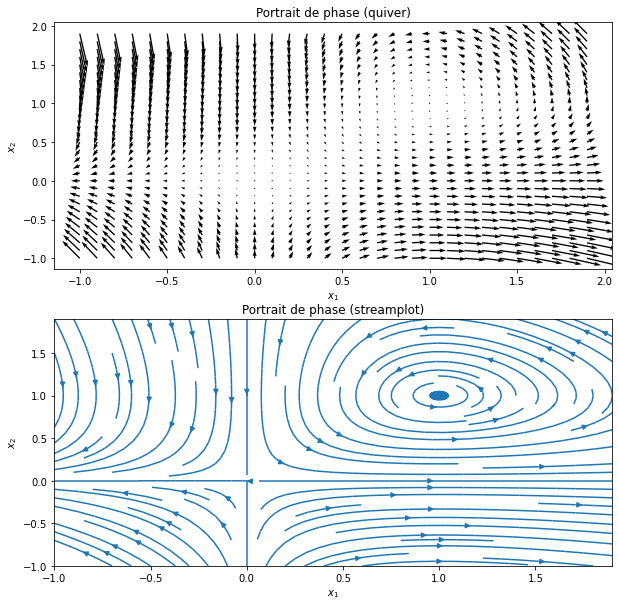

In [3]:
plt.figure()

x1 = np.arange(-1,2,0.1)
x2 = np.arange(-1,2,0.1)

X1,X2 = np.meshgrid(x1, x2)

# Avec quiver

plt.subplot(211, title = "Portrait de phase (quiver)", xlabel = "$x_1$", ylabel = "$x_2$")
u = x1_prime(X1, X2)
v = x2_prime(X1, X2)
plt.quiver(X1, X2, u, v)

# Avec streamplot

plt.subplot(212, title = "Portrait de phase (streamplot)", xlabel = "$x_1$", ylabel = "$x_2$")
u = x1_prime(X1, X2)
v = x2_prime(X1, X2)
plt.streamplot(X1, X2, u, v, density = 1)


plt.show()

### Question 5 : Courbes de niveau de H

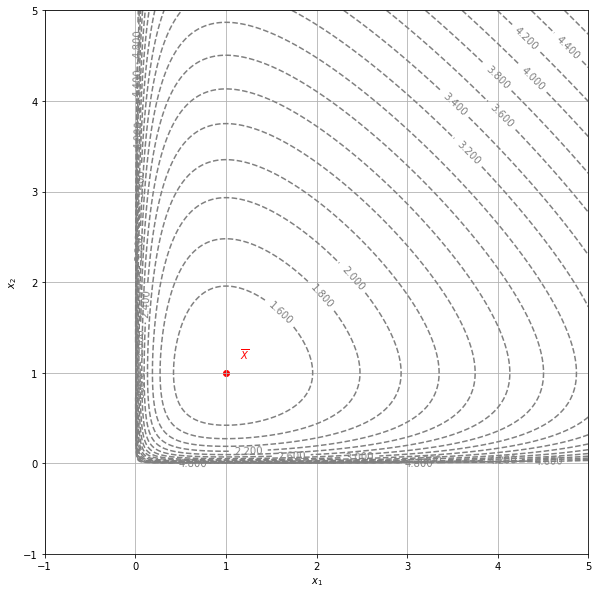

In [4]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(H, np.linspace(-1, 5, 1000), np.linspace(-1, 5, 1000), np.arange(-2, 5, 0.2))

plt.scatter(gamma/delta, alpha/beta, color = 'red')
plt.annotate(text = "$ \overline{X} $", xy =(gamma/delta, alpha/beta), xytext =(gamma/delta + 0.15, alpha/beta + 0.15), color = 'red')

plt.show()

On a $ \frac{dH(x_1(t), x_2(t))}{dt} = 0 $ pour $(x_1,x_2)$ solution des équations de Lotka-Volterra d'après la question précédente. Ce qui signifique que pour un $x_0 \in \mathbb{R}_+ ^2 $, point initial ( $ x_0 = (x_1(0),x_2(0))$ ), on a : $$ H(x_1(t), x_2(t)) = H(x_0) = H_0, \space\space \forall t \in \mathbb{R}$$ 

Les solutions appartiennent donc à la courbe de niveau $H_0$. C'est à dire : 
$$

\forall x \in S_{LV}(x_0), \space x \in C_{H_0}

$$
Où $ C_{H_0} $ est la courbe de niveau $H_0$ de $H$.


On conjecturera graphiquement que les courbes de niveau proches de $H(\bar{x})$ forment des boucles autour de $\bar{x}$, ainsi pour tout $x_0$ suffisamment proche de $\bar{x}$, les solutions des équations de Lotka-Volterra ne s'éloignent pas plus qu'une distance arbitraire de $\bar{x}$. Et plus on s'approche de $\bar{x}$, plus la boucle est refermée sur $\bar{x}$

De façon plus formelle on conjecture graphiquement : 
$$ 
\forall \epsilon > 0, \space \exists x_0 \in \mathbb{R}_+^2 \space tel \space que \space C_{H_0} \subset B(\bar{x}, \epsilon) 
$$

Donc on a en particulier $|| x_0 - \bar{x} || < \epsilon $.

Or par ce qui précède :
$$ 
\forall x \in S_{LV}(x_0), \space x \in C_{H_0} 
$$

Donc $|| x(t) - \bar{x} || < \epsilon, \space \forall t \in \mathbb{R} $.

En prenant $\eta = \epsilon $ on a donc : pour tout $\epsilon >0$, il existe $\eta > 0$ tek que pour tout $x_0$ vérifiant $|| x_0 - \bar{x} || < \eta$, toute solution maximale $x \in S_{LV}(x_0)$ vérifie || x(t) - \bar{x} || < \epsilon$

Conclusion $\bar{x} $ est stable au sens de la définition de stabilité.

### Question 6 : Euler explicite

In [5]:
def solve_euler_explicit(f, x0, dt, t0, tf) :
    steps = int((tf-t0)/dt) + 1

    t = np.empty(steps+1)

# On distingue les cas où on a une fonction scalaire et une fonction vectorielle
    if type(x0) == np.ndarray :
        x = np.empty((steps+1,x0.shape[0]))

    else :
        x = np.empty(steps+1)
        
    t[0], x[0] = t0, x0
    

    for i in range(steps) :

        x[i+1] = x[i] + dt*f(t[i], x[i])
        t[i+1] = dt + t[i]
        i += 1

    return t, x

Testons cette méthode sur la fonction exponentielle, solution du problème de Cauchy :
$$
\left\{
    \begin{array}{ll}
        \dot{x} = x = f(t, x), \space \forall t \in \mathbb{R} \\
        x(0) = 1
    \end{array}
\right.
$$

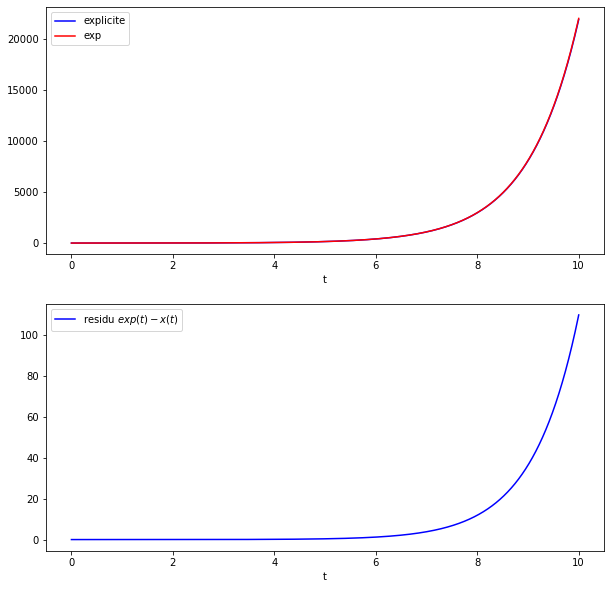

In [6]:
#f(x,t) pour que x : t -> x(t) soit la fonction exponentielle
def f1(t, x) :
    return x
    
T1, X1 = solve_euler_explicit(f1, x0 = 1, dt = 0.001, t0 = 0, tf = 10)


plt.subplot(211)
plt.plot(T1, X1, label = "explicite", color = 'blue')
plt.plot(T1, np.exp(T1), label = "exp", color = 'red')
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.plot(T1, abs(np.exp(T1) - X1), label = "residu $exp(t)-x(t)$", color = 'blue')
plt.legend()
plt.xlabel('t')

plt.show();

Pour vérifier la convergence, reproduisons ce graph pour plusieurs valeures de dt.

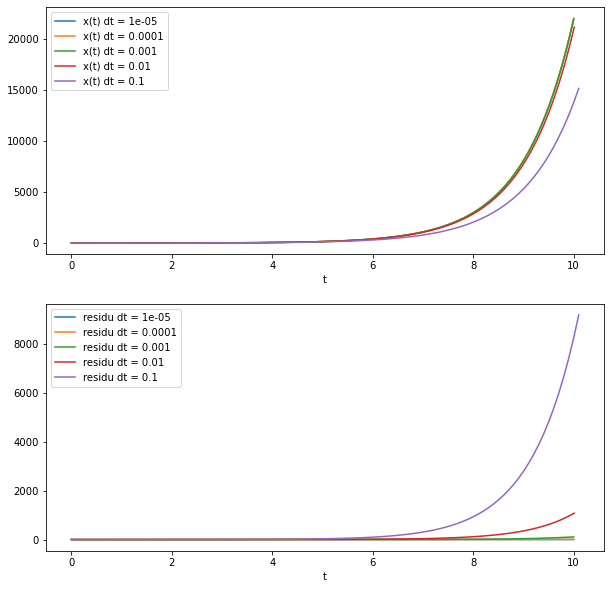

In [7]:
DT_list = np.logspace(-5, -1, 5, base = 10) 

T= np.arange(0,10,1000)
plt.plot(T, np.exp(T), label = "exp")
etamax_list = [] # On stock les valeurs résiduelles max de chaque dt en prévision de la fin de la question

for dt in DT_list :
    
    T, X = solve_euler_explicit(f1, x0 = 1, dt = dt, t0 = 0, tf = 10)

    plt.subplot(211)
    plt.plot(T, X, label = f"x(t) dt = {dt}")

    eta = abs(np.exp(T) - X)

    plt.subplot(212)
    plt.plot(T, eta, label = f"residu dt = {dt}")


    eta_max = np.amax(eta)
    etamax_list.append([eta_max, dt])

etamax_list = np.array(etamax_list) 

plt.subplot(211)
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.legend()
plt.xlabel('t')

plt.show();

Avec la réduction de $dt$, les courbes viennent se "coller" à la fonction exacte (ici l'exponentielle), et le résidu décroit.
On cherche à trouver l'ordre de convergence définit par $ p \in \mathbb{N}$ tel que 
$$
\max_{ 0 \leq j \leq J} ||x^j - x(t_j)|| \leq c_v (dt)^p, \space avec \space c_v > 0
$$
Pour cela fait tourner le schéma d'Euler explicite pour plusieurs valeurs de dt comme précédemment et on conserve à chaque fois la valeur résiduelle maximale. Posons $\eta_{max}(dt)$ cette valeur. On trace ensuite la courbe de la fonction $h$ vérifiant $log(\eta_{max}) = h(log(dt))$. On s'attend à pouvoir majorer $h$ par une fonction affine $x \mapsto px+ln(c_v)$ où on retrouve ainsi l'ordre de convergence $p$.

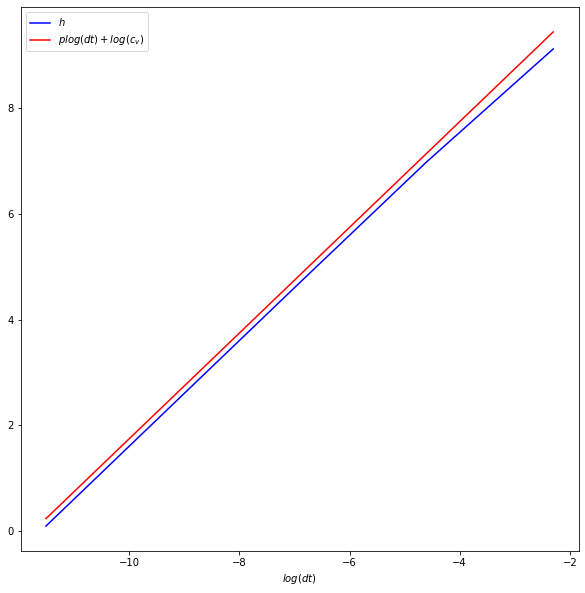

In [8]:
DT_log = np.log(etamax_list[:, 1])
plt.plot(DT_log, np.log(etamax_list[:, 0]), label = "$h$", color = 'blue')


# qu'on peut approximer par :
plt.plot(DT_log, DT_log+11.75, label = "$plog(dt)+log(c_v)$", color = 'red')

plt.xlabel("$log(dt)$")
plt.legend()
plt.show();


On remarque qu'on a une assez bonne approximation de $h$ avec la fonction affine $x \mapsto x + 11.75$ bien que l'ordonnée à l'origine nous interesse peu ici, on a surtout $p = 1$ comme ordre de convergence.

### Question 7 : Application aux équations de Lokta-Volterra


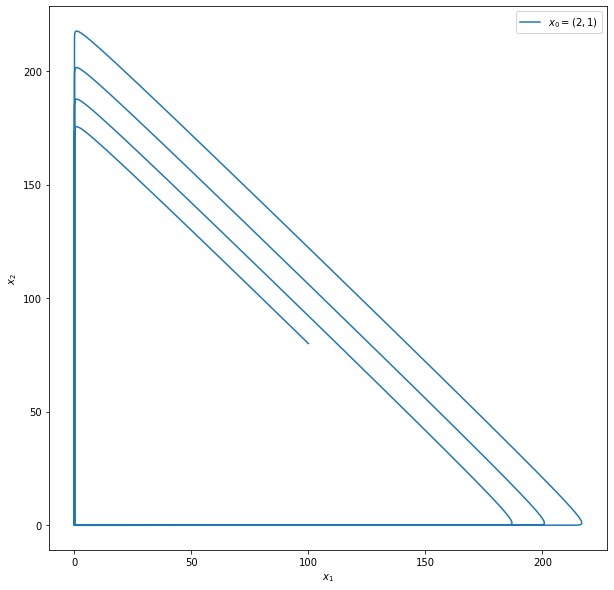

In [14]:
# On commence par créer la fonction vérifiant dx/dt = f(t,x)
def f2(t, x) :
    x1, x2 = x[0], x[1]
    return np.array([x1_prime(x1, x2), x2_prime(x1, x2)])

# Puis on applique le schéma explicite d'Euler
T, X = solve_euler_explicit(f2, x0 = np.array([100, 80]), dt = 10**-3, t0 = 0, tf = 1000)

x1, x2 = X[:, 0], X[:, 1]

plt.plot(x1, x2, label = "$x_0 = (2,1)$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show();

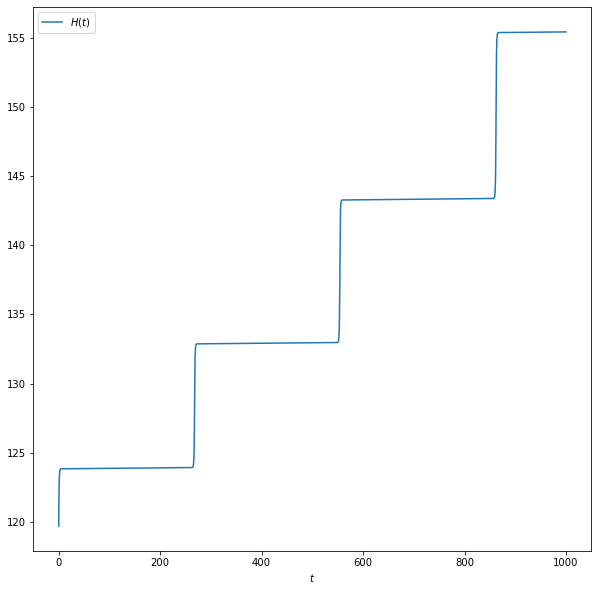

In [15]:
H_list = H(x1, x2)
plt.plot(T, H_list, label = "$H(t)$")
plt.legend()
plt.xlabel("$t$")
plt.show();

On constate qu'avec un temps assez long la fonction diverge, la pseudo boucle qu'elle forme s'élargie à chaque révolution et s'éloigne à chaque fois un peu plus du point d'équilibre, ce qui ne devrait pas être le cas d'après la question 4.
Cette constatation est corroborée par le second graphe. En effet la fonction H devrait être constante le long des solutions, ce n'est pas du tout ce qu'on observe au contraire elle semble varier par palier à chaque révolution de la courbe de niveau.

Le schéma explicite n'est donc pas fidèle à la réalité à temps long.

### Question 8 : Euler implicite

In [29]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100) :
    steps = int((tf-t0)/dt) + 1

    t = np.empty(steps+1)

    if type(x0) == np.ndarray :
        x = np.empty((steps+1,x0.shape[0]))

    else :
        x = np.empty(steps+1)
        
    t[0], x[0] = t0, x0


    for i in range(steps) :

        t[i+1] = t[i] + dt
        
        L = [x[i] + dt*f(t[i],x[i])]
        k = 0

        while  (k == 0) or (k < itermax and np.linalg.norm((L[-1]-L[-2])/np.linalg.norm(L[0])) <= 10**-7 ) :

            L.append(x[i]+ dt * f(t[i+1], L[-1]))
            k += 1

        x[i+1] = L[-1]

    return t, x


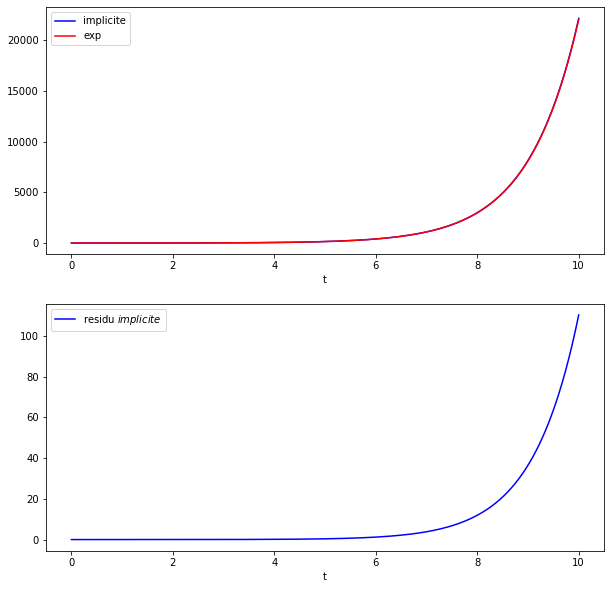

In [30]:
T2, X2 = solve_euler_implicit(f1, x0 = 1, dt = 0.001, t0 = 0, tf = 10)


plt.subplot(211)
plt.plot(T2, X2, label = "implicite", color = 'blue')
plt.plot(T2, np.exp(T2), label = "exp", color = 'red')
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.plot(T2, abs(np.exp(T2) - X2), label = "residu $implicite$", color = 'blue')
plt.legend()
plt.xlabel('t')

plt.show();

0.0001
0.001
0.01
0.1


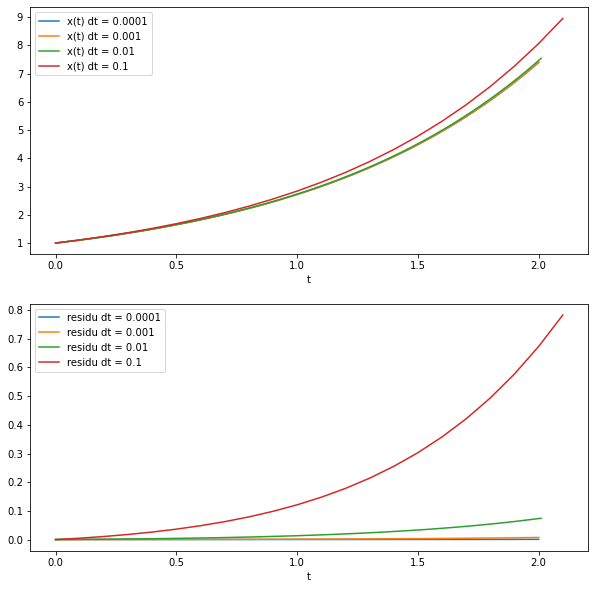

In [42]:
DT_list = np.logspace(-4, -1, 4, base = 10) 

T= np.arange(0,10,1000)
plt.plot(T, np.exp(T), label = "exp")

for dt in DT_list :

    T, X = solve_euler_implicit(f1, x0 = 1, dt = dt, t0 = 0, tf = 2)

    plt.subplot(211)
    plt.plot(T, X, label = f"x(t) dt = {dt}")

    eta = abs(np.exp(T) - X)

    plt.subplot(212)
    plt.plot(T, eta, label = f"residu dt = {dt}")



plt.subplot(211)
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.legend()
plt.xlabel('t')

plt.show();

Sur la fonction exponentielle, les deux schémas se comportent de la même facon avec la même divergence. Le schéma implicite converge également, toutefois on notera qu'il demande un temps de calcul bien plus long (ce qui nous a contraint à prendre moins de valeurs de dt et une amplitude de temps moins longue). Vérifions si cela change quelque chosr sur les équations de Lokta-Volterra.

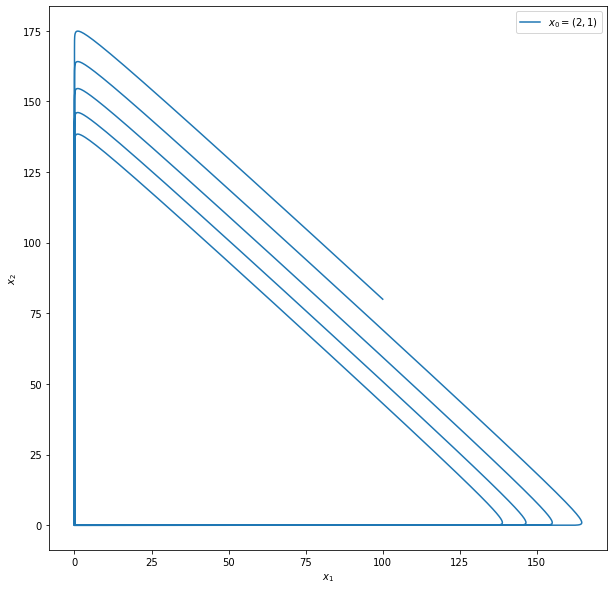

In [43]:
T, X = solve_euler_implicit(f2, x0 = np.array([100, 80]), dt = 10**-3, t0 = 0, tf = 1000)

x1, x2 = X[:, 0], X[:, 1]

plt.plot(x1, x2, label = "$x_0 = (2,1)$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show();

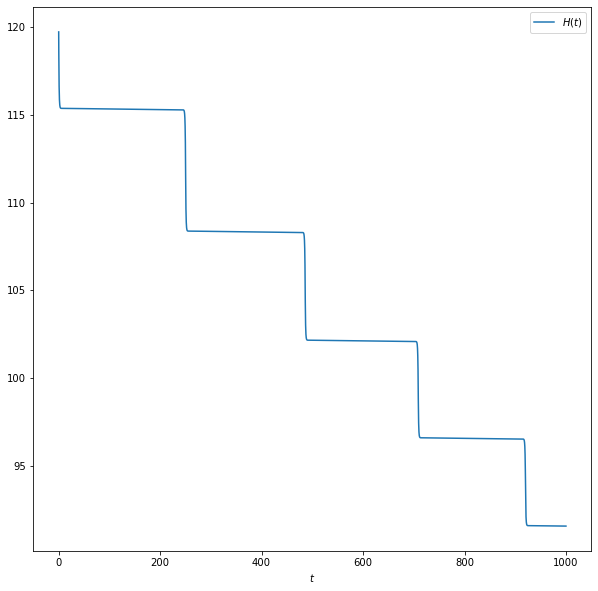

In [44]:
H_list = H(x1, x2)
plt.plot(T, H_list, label = "$H(t)$")
plt.legend()
plt.xlabel("$t$")
plt.show();

Cette fois ci on remarque le phénomène inverse : $H$ décroit le long des solutions trouvées et la boucle se referme sur le point d'équilibre. Ce n'est pas non plus réaliste.